# Projet  Inpainting

# Nom: SAHLI
# Prenom: OUSSAMA

# Professeur: MR Nicolas Baskiotis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.utils.fixes import loguniform

In [2]:
###############################################################################
# CHARGEMENT DES DONNEES
###############################################################################


def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

In [3]:
trainx , trainy = load_usps ( "USPS/USPS_train.txt" )
testx , testy = load_usps ( "USPS/USPS_test.txt" )

normalized = MinMaxScaler().fit(trainx)
trainx = normalized.transform(trainx)
testx = normalized.transform(testx)


In [4]:
# classe num1 vs classe num2

def genere_Data(datax,datay,num1,num2): 
    t=0
    for i in range (0,len(datay)):
        if ( datay[i]==num1 or   datay[i]==num2):
            t+=1
    X=np.zeros((t,len(datax[0])))
    Y=np.zeros(t)
    c=0
    
    for i in range (0,len(datay)): 
        if ( datay[i]==num1): 
            X[c]=datax[i]
            Y[c]=1
            c+=1
        elif ( datay[i]==num2 ):
            X[c]=datax[i]
            Y[c]=-1
            c+=1
    return X,Y

In [5]:
num1=3
num2=6
trainx_3vs6,trainy_3vs6=genere_Data(trainx,trainy,num1,num2)
testx_3vs6,testy_3vs6=genere_Data(testx,testy,num1,num2)


In [6]:
# classe num vs autres

def Tranform(datay,num): 
    Y=np.zeros(len(datay))  
    
    for i in range (0,len(datay)):  
        if ( datay[i]==num):   
            Y[i]=1
        else:
            Y[i]=-1
    return Y    

# classe num vs les autres 
num=9
trainy_9vsall=Tranform(trainy,num)
testy_9vsall=Tranform(testy,num)

In [7]:
###############################################################################
#LinearRegression
###############################################################################

print("\n REGRESSION LINEAIRE :\n______________________\n")
#3vs6
print("\n 3 VS 6: \n______________________\n")
RL=LinearRegression()
parameters = {'fit_intercept':[True,False], 'copy_X':[True, False]}

RLgridOne = GridSearchCV(RL,parameters, cv=None)
RLgridOne.fit(trainx_3vs6,trainy_3vs6)
print ("r2 / variance : ", RLgridOne.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((RLgridOne.predict(testx_3vs6) - testy_3vs6) ** 2))

p = np.sign(RLgridOne.predict(testx_3vs6)) 
print(classification_report(testy_3vs6, p)) 



 REGRESSION LINEAIRE :
______________________


 3 VS 6: 
______________________

r2 / variance :  0.8901747031309133
Residual sum of squares: 0.15
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.99       170
         1.0       0.99      0.98      0.98       166

    accuracy                           0.99       336
   macro avg       0.99      0.99      0.99       336
weighted avg       0.99      0.99      0.99       336



In [8]:
# 9vsall
print("\n 9 VS ALL: \n______________________\n")

RLgridAll = GridSearchCV(RL,parameters, cv=None)
RLgridAll.fit(trainx,trainy_9vsall)
print ("r2 / variance : ", RLgridAll.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((RLgridAll.predict(testx) - testy_9vsall) ** 2))

p = np.sign(RLgridAll.predict(testx)) 
print(classification_report(testy_9vsall, p)) 


 9 VS ALL: 
______________________

r2 / variance :  0.4403374279154648
Residual sum of squares: 0.18
              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.98      1830
         1.0       0.93      0.64      0.76       177

    accuracy                           0.96      2007
   macro avg       0.95      0.82      0.87      2007
weighted avg       0.96      0.96      0.96      2007



On remarque que la regression linéaire fonctionne mieux sur des problemes de classification binaires. Les résultats deviennent moins bon sur un problème multiclasse.

In [9]:
###############################################################################
# REGRESSION DE RIDGE
###############################################################################

print("\n REGRESSION DE RIDGE :\n______________________\n")

print("\n 3 VS 6: \n______________________\n")

parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,
                               200, 230, 250,265, 270, 275, 290, 300, 500,1000]}

RI=Ridge()
RIgridOne = GridSearchCV( RI, parameters, cv=5)
RIgridOne.fit(trainx_3vs6,trainy_3vs6)
print ("r2 / variance : ", RIgridOne.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((RIgridOne.predict(testx_3vs6) - testy_3vs6) ** 2))

p = np.sign(RIgridOne.predict(testx_3vs6)) 
print(classification_report(testy_3vs6, p)) 



 REGRESSION DE RIDGE :
______________________


 3 VS 6: 
______________________

r2 / variance :  0.924666815230518
Residual sum of squares: 0.09
              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       170
         1.0       0.99      0.99      0.99       166

    accuracy                           0.99       336
   macro avg       0.99      0.99      0.99       336
weighted avg       0.99      0.99      0.99       336



In [10]:

print("\n 9 VS ALL: \n______________________\n")

RIgridAll = GridSearchCV(RI,parameters, cv=None)
RIgridAll.fit(trainx,trainy_9vsall)
print ("r2 / variance : ", RIgridAll.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((RIgridAll.predict(testx) - testy_9vsall) ** 2))

p = np.sign(RIgridAll.predict(testx)) 
print(classification_report(testy_9vsall, p)) 



 9 VS ALL: 
______________________

r2 / variance :  0.45407340669707325
Residual sum of squares: 0.17
              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.98      1830
         1.0       0.96      0.64      0.77       177

    accuracy                           0.97      2007
   macro avg       0.96      0.82      0.87      2007
weighted avg       0.97      0.97      0.96      2007



In [11]:
###############################################################################
# REGRESSION DE LASSO
###############################################################################

print("\n REGRESSION DE LASSO :\n______________________\n")

print("\n 3 VS 6: \n______________________\n")

LA=Lasso()
LAgridOne = GridSearchCV( LA, parameters, cv=5)
LAgridOne.fit(trainx_3vs6,trainy_3vs6)
print ("r2 / variance : ", LAgridOne.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((LAgridOne.predict(testx_3vs6) - testy_3vs6) ** 2))

p = np.sign(LAgridOne.predict(testx_3vs6)) 
print(classification_report(testy_3vs6, p)) 



 REGRESSION DE LASSO :
______________________


 3 VS 6: 
______________________

r2 / variance :  0.9242141928335214
Residual sum of squares: 0.10
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.99       170
         1.0       0.99      0.98      0.99       166

    accuracy                           0.99       336
   macro avg       0.99      0.99      0.99       336
weighted avg       0.99      0.99      0.99       336



In [12]:
print("\n 9 VS ALL: \n______________________\n")

LAgridAll = GridSearchCV(LA,parameters, cv=None)
LAgridAll.fit(trainx,trainy_9vsall)
print ("r2 / variance : ", LAgridAll.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((LAgridAll.predict(testx) - testy_9vsall) ** 2))

p = np.sign(LAgridAll.predict(testx)) 
print(classification_report(testy_9vsall, p)) 


 9 VS ALL: 
______________________

r2 / variance :  0.4503198425366487
Residual sum of squares: 0.17
              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.98      1830
         1.0       0.96      0.63      0.76       177

    accuracy                           0.97      2007
   macro avg       0.96      0.82      0.87      2007
weighted avg       0.96      0.97      0.96      2007





 Vecteur Poid REGRESSION LINEAIRE 3vs6: 



 Norme vecteur Poid:
183.25969017697702


 Nombre de coordonnee non null:
256


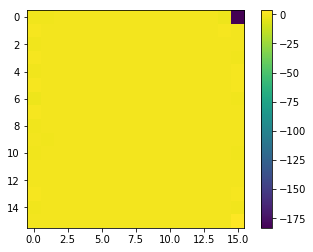

In [13]:
###############################################################################
#OBSERVATION VECTEUR DE POIDS ( NORME ET NOMBRE DE COMPOSANTE NON NULL)
###############################################################################

# lINEAR REGRESSION

print("\n\n Vecteur Poid REGRESSION LINEAIRE 3vs6: \n")
plt.figure()
w1=RLgridOne.best_estimator_.coef_ 
plt.imshow(w1.reshape(16,16))
plt.colorbar()

print("\n\n Norme vecteur Poid:")
print(np.linalg.norm(w1))
print("\n\n Nombre de coordonnee non null:")
v=np.where(w1==0)[0]
print(len(w1)-len(v))




 Vecteur Poid REGRESSION LINEAIRE 9vsall: 



 Norme vecteur Poid:
1.2353559797836366


 Nombre de coordonnee non null;
256


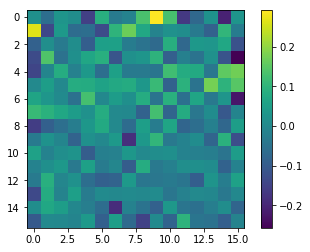

In [14]:
print("\n\n Vecteur Poid REGRESSION LINEAIRE 9vsall: \n")
plt.figure()
w2=RLgridAll.best_estimator_.coef_ 
plt.imshow(w2.reshape(16,16))
plt.colorbar()

print("\n\n Norme vecteur Poid:")
print(np.linalg.norm(w2))
print("\n\n Nombre de coordonnee non null;")
v=np.where(w2==0)[0]
print(len(w2)-len(v))




 Vecteur Poid REGRESSION RIDGE 3vs6: 



 Norme vecteur Poid:
0.8684644898895876


 Nombre de coordonnee non null:
256


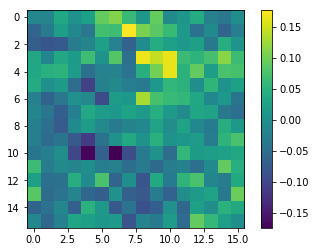

In [15]:
# RIDGE REGRESSION

print("\n\n Vecteur Poid REGRESSION RIDGE 3vs6: \n")
plt.figure()
w3=RIgridOne.best_estimator_.coef_ 
plt.imshow(w3.reshape(16,16))
plt.colorbar()

print("\n\n Norme vecteur Poid:")
print(np.linalg.norm(w3))
print("\n\n Nombre de coordonnee non null:")
v=np.where(w3==0)[0]
print(len(w3)-len(v))



 Vecteur Poid REGRESSION RIDGE 9vsall: 



 Norme vecteur Poid:
0.6425916160123288


 Nombre de coordonnee non null:
256


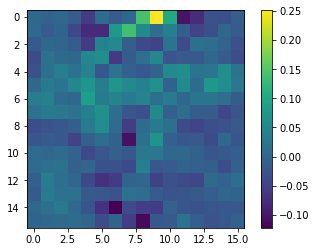

In [16]:
print("\n\n Vecteur Poid REGRESSION RIDGE 9vsall: \n")
plt.figure()
w4=RIgridAll.best_estimator_.coef_ 
plt.imshow(w4.reshape(16,16))
plt.colorbar()

print("\n\n Norme vecteur Poid:")
print(np.linalg.norm(w4))
print("\n\n Nombre de coordonnee non null:")
v=np.where(w4==0)[0]
print(len(w4)-len(v))



 Vecteur Poid REGRESSION LASSO 3vs6: 



 Norme vecteur Poid:
0.8291950488109433


 Nombre de coordonnee non null:
121


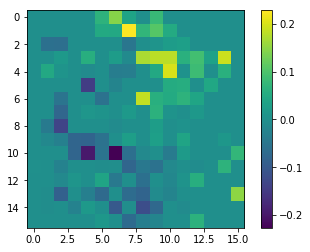

In [17]:
# LASSO REGRESSION

print("\n\n Vecteur Poid REGRESSION LASSO 3vs6: \n")
plt.figure()
w5=LAgridOne.best_estimator_.coef_ 
plt.imshow(w5.reshape(16,16))
plt.colorbar()

print("\n\n Norme vecteur Poid:")
print(np.linalg.norm(w5) )
print("\n\n Nombre de coordonnee non null:")
v=np.where(w5==0)[0]
print(len(w5)-len(v))



 Vecteur Poid REGRESSION LASSO 9vsall: 



 Norme vecteur Poid:
0.6791063256349351


 Nombre de coordonnee non null:
113


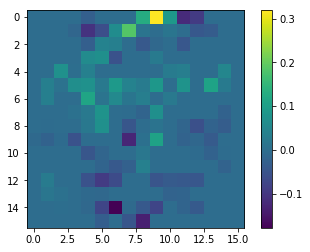

In [18]:
print("\n\n Vecteur Poid REGRESSION LASSO 9vsall: \n")
plt.figure()
w6=LAgridAll.best_estimator_.coef_ 
plt.imshow(w6.reshape(16,16))
plt.colorbar()

print("\n\n Norme vecteur Poid:")
print(np.linalg.norm(w6))
print("\n\n Nombre de coordonnee non null:")
v=np.where(w6==0)[0]
print(len(w6)-len(v))



In [19]:
# POUR LA REGRESSION DE LASSO ET RIDGE , ON PEUT FAIRE VARIER LE PARAMTRE ALPHA 
# POUR OBSERVER LEVOLUTION DE LA NORME EN FINCTION DU PARAMETRE ALPHA CHOISIT

# ON PEUT LE FAIRE AUSSI POUR LE NOMBRE DE COORDONNEE NON NULL

#RIDGE
RI_W = []
RI_N   = []
L=[0.0001,0.001,0.01,0.1,1,10,100,
                               200, 230, 250,265, 270, 275, 290, 300, 500,1000]

for a in L:
  RI = Ridge(alpha=a)
  RI.fit(trainx_3vs6,trainy_3vs6)
  w=RI.coef_
  RI_W.append(w)
  n=np.linalg.norm(w)
  RI_N.append(n)

In [20]:
#LASSO
  
LA_W = []
LA_N   = []

for a in L:
  LA = Lasso(alpha=a)
  LA.fit(trainx_3vs6,trainy_3vs6)
  w=LA.coef_
  LA_W.append(w)
  n=np.linalg.norm(w)
  LA_N.append(n)


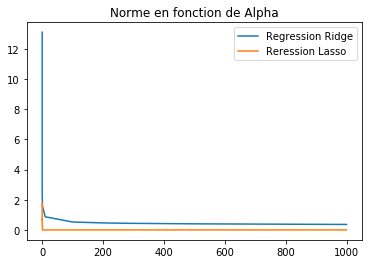

In [21]:
# AFFICHAGE
  
# NORME EN FONCTION DE ALPHA
  
plt.figure()
plt.title("Norme en fonction de Alpha")
plt.plot(L,RI_N, label="Regression Ridge")
plt.plot(L, LA_N, label="Reression Lasso")
plt.legend()
plt.show()

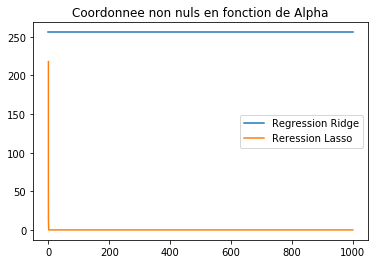

In [22]:
# NOMBRE DE COORDONNEE NON NULL EN FOCNTION DE ALPHA

RI_Z=[]
LA_Z=[]

for w in RI_W:
    v=np.where(w==0)[0]
    RI_Z.append(len(w)-len(v))

for w in LA_W:
    v=np.where(w==0)[0]
    LA_Z.append(len(w)-len(v))


plt.figure()
plt.title("Coordonnee non nuls en fonction de Alpha")
plt.plot(L,RI_Z, label="Regression Ridge")
plt.plot(L, LA_Z, label="Reression Lasso")
plt.legend()
plt.show()

# OBSERVATION :

En ce qui concerne la regression de ridge la norme diminue lorsque alpha augmente. ET le parametre alpha n'a pas d'influence sur le nombre de coordonnées non nul du vecteur poid car on voit que la la droite est constante ( toujours à 256  coordonées non nul). Pour la regresion de Lasso,  on observe que lorsque le paramètre alpha augmente,la norme diminue (mais les variations ne sont pas aussi flagrante que ridge , ici la norme varie ente 0 et 2). On observe aussi que plus le parametre alpha augmente, 
plus le nombre de coordonnée non nul diminue ( ainsi plus aplha est grand et plus le vecteur de poids contiendra des coordonées nuls.)

On peut dire alors, que pour la regression de ridge , le paramètre alpha a une forte influence sur la norme de vecteur poids. Et que pour la regression de Lasso , le parametre alpha a une forte influence sur le nombre de coordonnées non nuls du vecteur poids.

On peut essayer d'associer la regresison de ridge avec celle de Lasso, pour obtenir un modèle régulier, qui prend à la fois en compte la norme  du vecteur poids et son nommbre de composantes non nulles.

# RECONSTRUCTION IMAGE : INPAINTING

J'ai utilisé la méthode présenté dans la primière référence. J'utilise la régression de lasso pour prédire. Je récupère les patch pour lesquels il exite des pixel manquants, et j'utilise les pixel existant dans ce patch pour predire les pixels manquants.

In [23]:
from matplotlib.colors import rgb_to_hsv
from matplotlib.colors import hsv_to_rgb

In [24]:
#Lire image et transformation en array

def read_im(fn) :
    n=255 # pour mettre les valeur dans [-1,1]
    return plt.imread(fn)/n

v=read_im("Image/ballon.jpg")

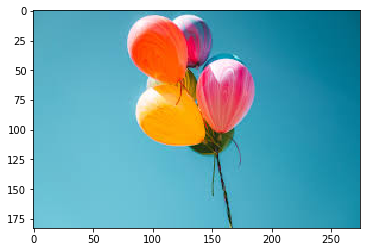

In [25]:
# affichage de l’image (et des pixels manquants) 

def image_visualization(T):
    plt.figure()
    plt.imshow(T)
    
image_visualization(v)


In [26]:
# permet de retourner le patch centré en (i, j) et de longueur h d’une image im

def get_patch(i,j,h,im):
    di=i-h//2 
    dj =j-h//2
    patch= im[di:di+h , dj:dj+h ,:].copy()
    return patch

p=get_patch(2,3,5,v)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


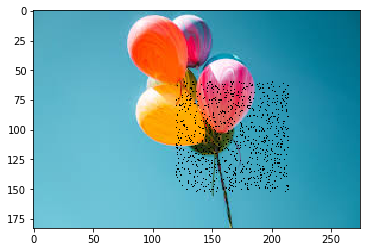

In [55]:
# noise permet de supprimer au hasard un pourcentage de pixel dans l’image

def noise(img,prc,a,b):
    copy=img.copy()
    M=np.zeros((copy.shape[0]*v.shape[1],2)).astype(int)
    cpt=0
    for i in range(a,copy.shape[0]-int(a/2)):
        for j in range(b,copy.shape[1]-int(b/2)):
            n=np.array([i,j])
            M[cpt]=n
            cpt+=1
        
    t=copy.shape[0]*v.shape[1]
    c= np.random.choice(t,int(prc*t) , replace=False)  
    
    #k=np.arange(1500,2000)
    #c=np.random.choice(k, int(prc*len(k)))
    for i in c :
        copy[M[i][0],M[i][1]]=np.array([-100,-100,-100]) 

    return copy

s=noise(v,0.1,60,120)
image_visualization(s)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


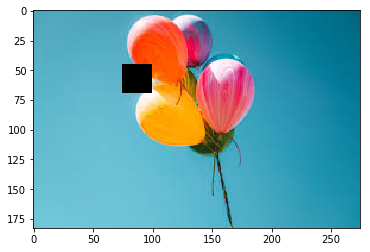

In [56]:
# supprimer tout un rectangle de l’image

def delete_rect(img,i,j,height,width):
    copy = img.copy()
    for e in range (i,i+height):
        for k in range (j,j+width ) :
            copy[e,k] = np.array([-100,-100,-100])
    return copy


image_visualization(delete_rect(v,45,75,25,25))   

In [57]:
# Permet de construire le dictionnaire
#le dico contient les patchs qui n'ont pas de pixel manquant

def Dico(im,h,step=1):
    D = []
    a=len(im)
    b=len(im[0])
    l=a-h
    k=b-h
    
    for i in range (0,l,step):
        for j in range (0,k,step) :
            p = get_patch(i+h//2,j+h//2,h,im)
            p=p.ravel()
            
            if (len(np.where(p!=-100)[0])>0):
                pr=True
            else:
                pr=False
            
            if(len(np.where(p==-100)[0])>0):
                t=True
            else:
                t=False
            if(pr==True and t==False):
                D.append(p)
    D=np.array(D)
    return D.T            
    
    
d=Dico(v,2)


In [58]:
###############################################################################
# LASSO
###############################################################################

# ne garde que la première dimension du pixel
# récupère les pixel manquant de l'image, pour lesquels il
# existe un pixel autour de lui
# on va les appeler les pixels limites.


def limite(img):
    l=img[:,:,0]
    d = []
    for i in range (0,len(l)):
        for j in range(0,len(l[0])):
            if (l[i,j]==-100 ):
                try: 
                    haut=l[i,j+1]
                    bas=l[i,j-1]
                    gauche=l[i-1,j]
                    droite=l[i+1,j]
                    if (haut!=-100 or gauche!=-100 or bas!=-100 or droite!=-100 ): 
                        d.append((i,j))
                except: 
                    pass
    return d

l=limite(v)

In [59]:
# retourne le patch centrer sur 
#un pixel limite qui contient  le plus de coordonnées
# parmis les pixels quil contient
    
#On cherche le patch centrer sur un pixel manquant qui contient
#le plus de pixels ( le moins de pixels manquant)
def limite_pixel_patch(v,l,h):
    pa=None
    pt = -100000
    pi = (-10000,-10000)
    for i in l:
        patch = get_patch (i[0],i[1],h,v) # patch centrer sur un pixel_limite
        patch=patch.ravel()
        n=len(np.where(patch!=-100)[0]) # nombre de coordonnées de pixel 
        if (n>pt):
            pi = i
            pa = patch
            pt=n         
    return pi, pa

lpi,lpa=limite_pixel_patch(v,l,5)

In [71]:
# PREDICTION
def pred(D,patch,alpha):
    LA=Lasso(alpha=alpha,max_iter=10000)
    train=np.argwhere(patch!=-100)
    train=train.ravel()
    test=np.argwhere(patch==-100)
    test=test.ravel()
    trainx=D[train]
    
    trainy=patch[train]
    LA.fit(trainx,trainy)
    testx=D[test]
    p=LA.predict(testx)
    return p,test


b=delete_rect(v,65,75,45,85)
d=Dico(b,5,5)
pl=limite(b)
pi,pa=limite_pixel_patch(b,pl,5)
pr,test=pred(d,pa,0.001)

In [72]:
###############################################################################
# Reconstruction
###############################################################################

#image="Image/ballon.jpg"
#image="Image/sonic.jpg"
image="Image/im3.jpg"

def reconstruct(im,i,j,height,width,step,h,alpha,rect=True,prc=0,a=0,b=0):
    img=read_im(im)
    norma= rgb_to_hsv(img)
    if(rect==True):
        bruit=delete_rect(norma,i,j,height,width)
        bruit_rgb=delete_rect(img,i,j,height,width)
    else:   
        bruit=noise(norma,prc,a,b)
        bruit_rgb=noise(img,prc,a,b)
    D=Dico(bruit,h,step)
    pixels_limite=limite(bruit)
    
    cpt=len(pixels_limite) # on remplit jusqua quil ni ai plus de pixel manquants
    while (cpt>0):
        pi,pa=limite_pixel_patch(bruit,pixels_limite,h)
        pr,test=pred(D,pa,alpha)
        pa[test]=pr
        # on change les pixels manquant pour reconstruire l'image bruiter
        p=pa.reshape(h,h,3)
        bruit[pi[0]-h//2:(pi[0]-h//2)+h,pi[1]-h//2:pi[1]-h//2+h,:]=p
    
        pixels_limite=limite(bruit)
        cpt=len(pixels_limite)
    
    return img,bruit_rgb,hsv_to_rgb(bruit)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


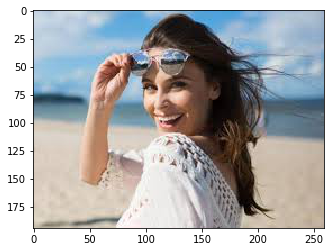

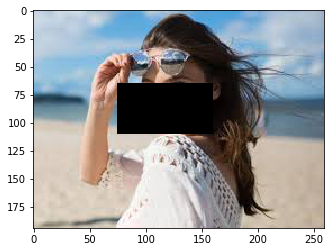

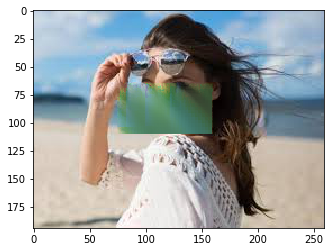

In [64]:
##############################################################################
# TEST
##############################################################################
img,bruit_rgb,bruit=reconstruct(image,65,75,45,85,3,5,0.001)      
image_visualization(img) 
image_visualization(bruit_rgb) 
image_visualization(bruit) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


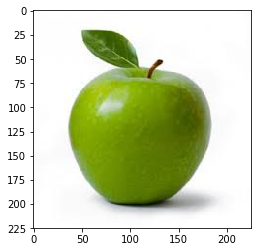

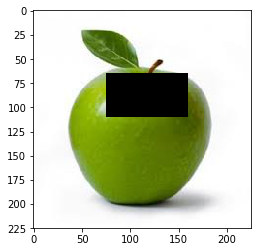

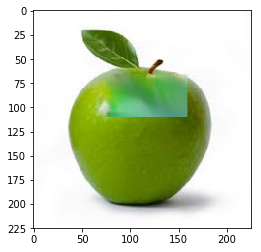

In [67]:
image="Image/pomme.jpg"
img,bruit_rgb,bruit=reconstruct(image,65,75,45,85,3,5,0.001)      
image_visualization(img) 
image_visualization(bruit_rgb) 
image_visualization(bruit) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


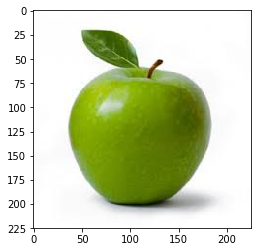

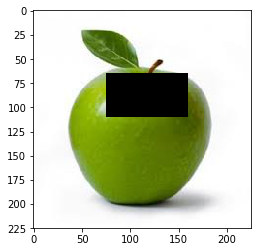

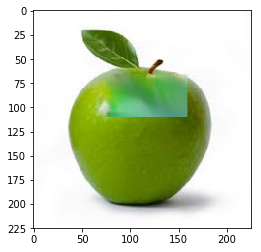

In [68]:
image="Image/pomme.jpg"
img,bruit_rgb,bruit=reconstruct(image,65,75,45,85,3,5,0.001)      
image_visualization(img) 
image_visualization(bruit_rgb) 
image_visualization(bruit) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


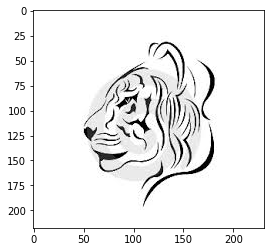

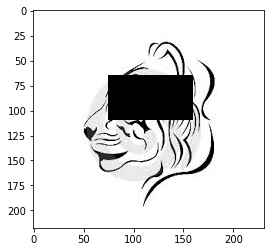

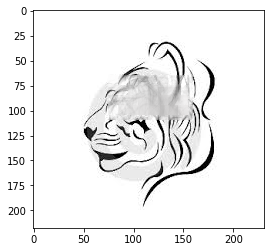

In [73]:
image="Image/lion.jpg"
img,bruit_rgb,bruit=reconstruct(image,65,75,45,85,3,20,0.001)      
image_visualization(img) 
image_visualization(bruit_rgb) 
image_visualization(bruit) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


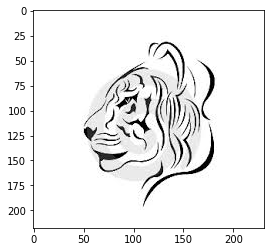

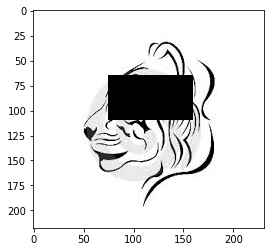

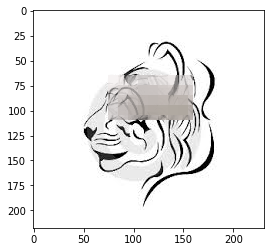

In [74]:
image="Image/lion.jpg"
img,bruit_rgb,bruit=reconstruct(image,65,75,45,85,5,20,0.01)      
image_visualization(img) 
image_visualization(bruit_rgb) 
image_visualization(bruit) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


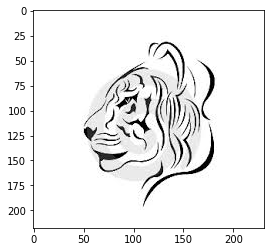

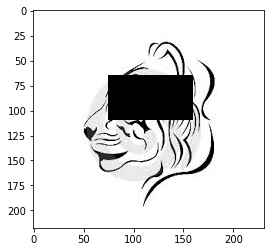

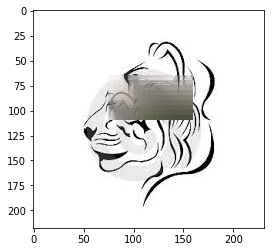

In [75]:
image="Image/lion.jpg"
img,bruit_rgb,bruit=reconstruct(image,65,75,45,85,5,10,0.01)      
image_visualization(img) 
image_visualization(bruit_rgb) 
image_visualization(bruit) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


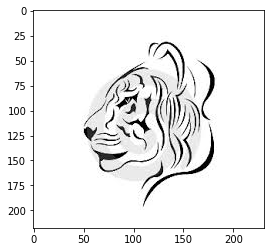

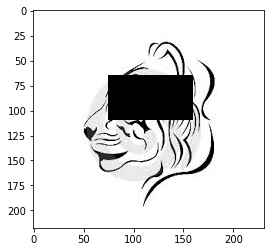

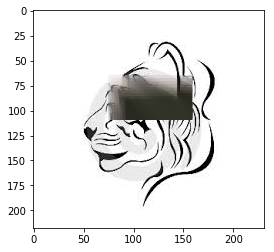

In [76]:
image="Image/lion.jpg"
img,bruit_rgb,bruit=reconstruct(image,65,75,45,85,1,5,0.01)      
image_visualization(img) 
image_visualization(bruit_rgb) 
image_visualization(bruit) 

Pour avoir de bons résultats, il faut que l'on règle les hyper-paramètre (h,alpha,step,etc..).

L'ordre de remplissage est important. Des ordres de remplissages  du patch différents, donneront des résultats différents.Pour remplir les patch pour lesquels  il exites des pixels manquants, j'ai choisit de prendre d'abord ceux qui ont le moins de pixels manquant. Cette méthode me permet d'avoir un maximum d'exemple pour mon ensemble de train , lors de la prédiction en utilisant l'algolirithme de la regression de Lasso. Cela me permettra d'obtenir un meilleur ajustement.

REMARQUE: faire varier les valeurs des hyper-paramètres prends beaucoup de temps.
